# 01 — Data Prep & EDA

This notebook loads the churn dataset, performs basic cleaning, and explores churn patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)

DATA_PATH = Path('../data/churn_synthetic.csv')  # replace with your real CSV if needed

df = pd.read_csv(DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,C100000,Male,0,No,No,56,No,No,No,No,No,No,No,No,No,Two year,Yes,Credit card,97.91,5471.51,Yes
1,C100001,Female,0,No,No,26,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card,47.80,1262.97,Yes
2,C100002,Male,1,Yes,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,50.31,238.00,Yes
3,C100003,Male,0,No,No,70,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,48.65,3401.71,No
4,C100004,Male,0,No,No,56,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer,28.84,1630.22,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [3]:
# Clean types and basic null handling
# Convert TotalCharges to numeric (common issue in churn datasets)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill numeric nulls with median
for col in ['TotalCharges']:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# Encode target
df['ChurnFlag'] = (df['Churn'] == 'Yes').astype(int)

# Quick overview of churn rate
churn_rate = df['ChurnFlag'].mean()
print(f'Churn rate: {churn_rate:.2%}')

# Save a processed copy for the modeling notebook
df.to_csv('../data/processed_churn.csv', index=False)
df.head()

Churn rate: 61.00%


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag
0,C100000,Male,0,No,No,56,No,No,No,No,No,No,No,No,No,Two year,Yes,Credit card,97.91,5471.51,Yes,1
1,C100001,Female,0,No,No,26,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card,47.80,1262.97,Yes,1
2,C100002,Male,1,Yes,No,4,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,50.31,238.00,Yes,1
3,C100003,Male,0,No,No,70,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,48.65,3401.71,No,0
4,C100004,Male,0,No,No,56,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer,28.84,1630.22,No,0


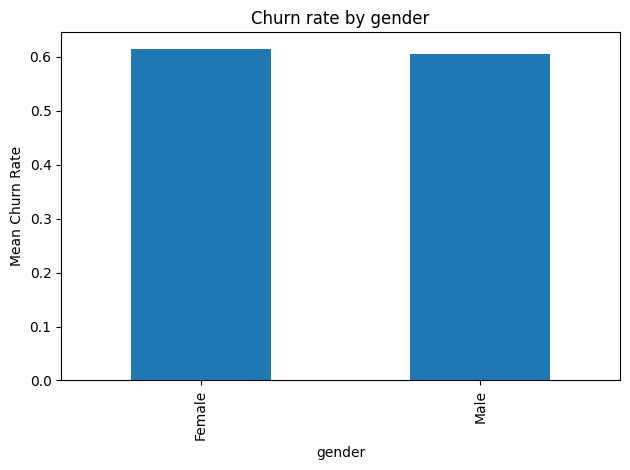

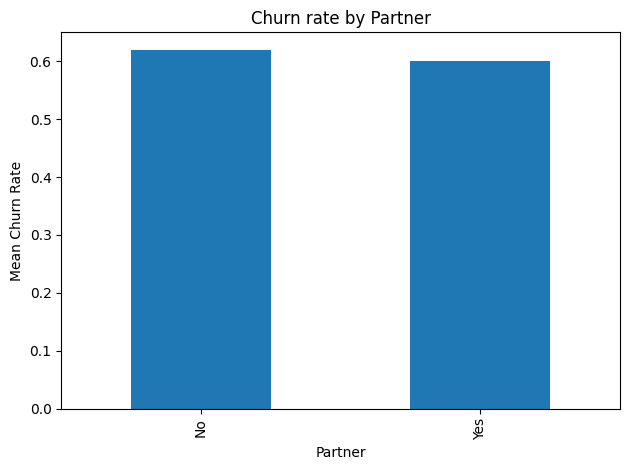

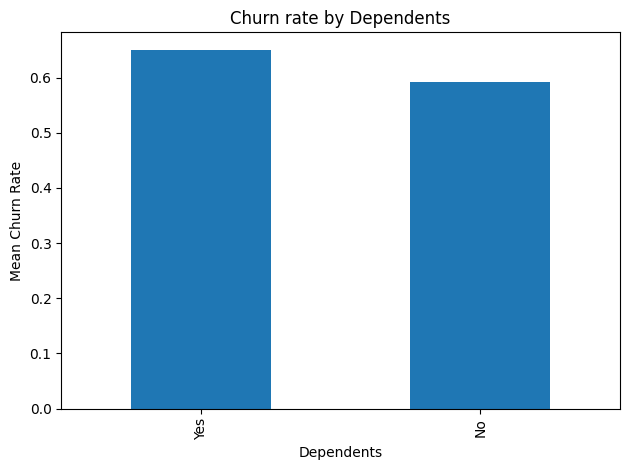

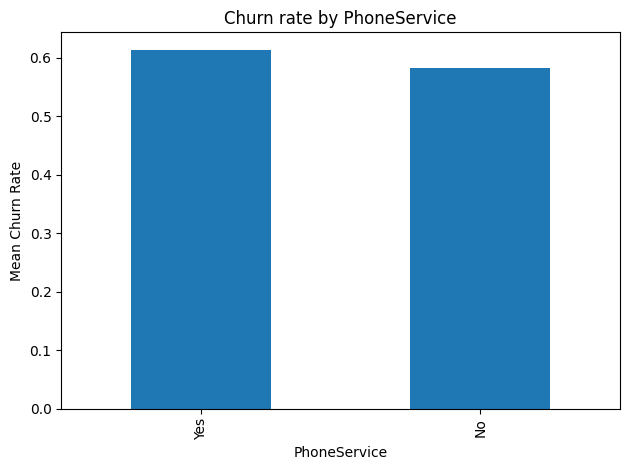

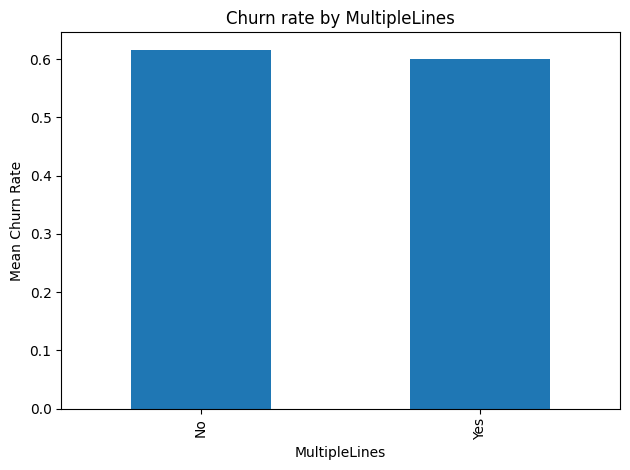

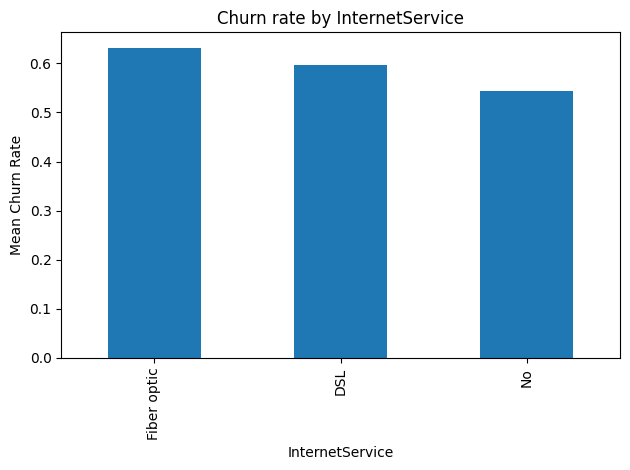

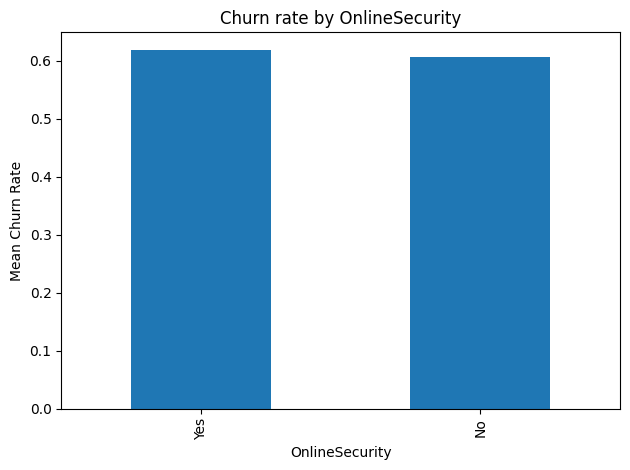

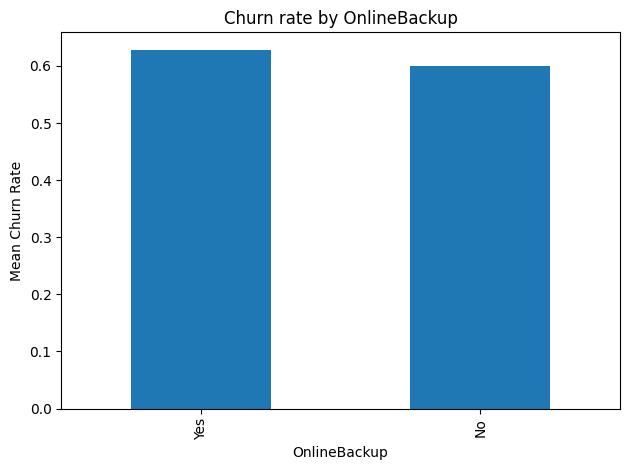

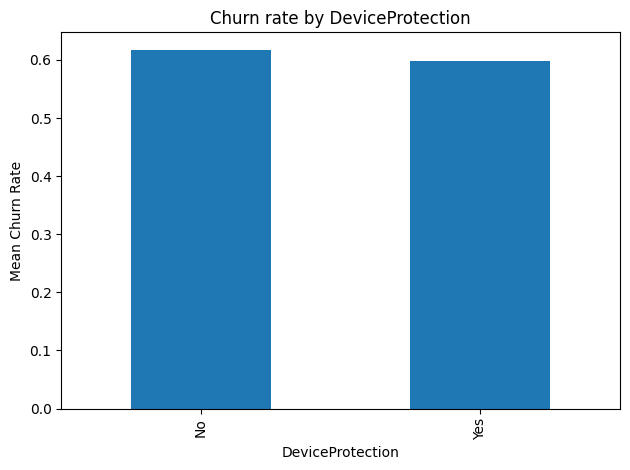

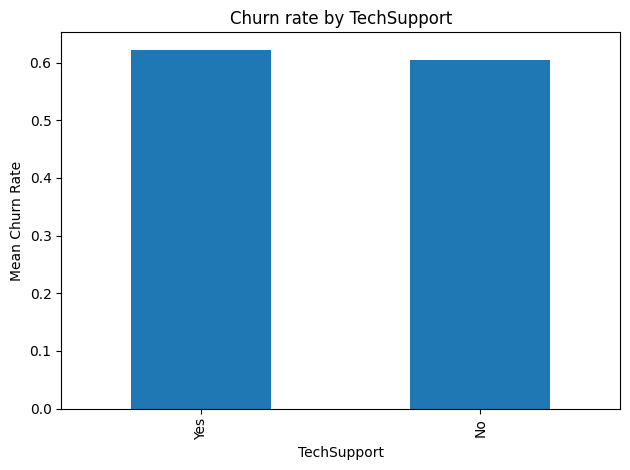

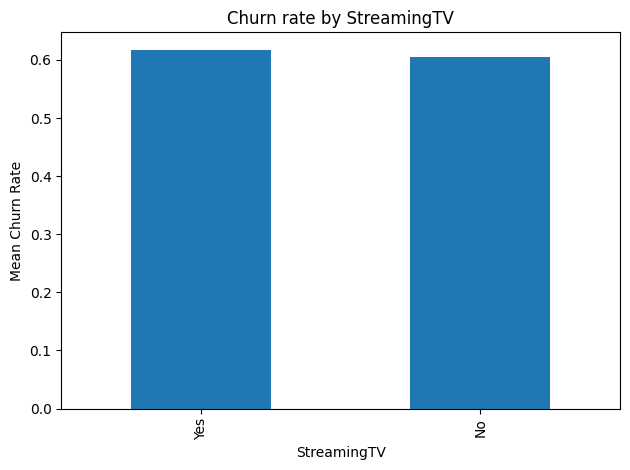

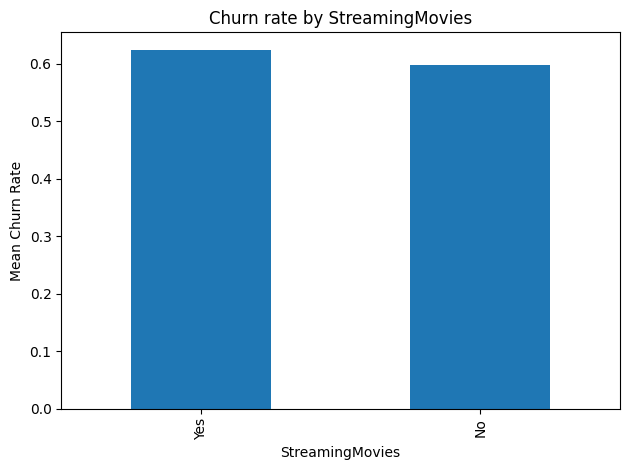

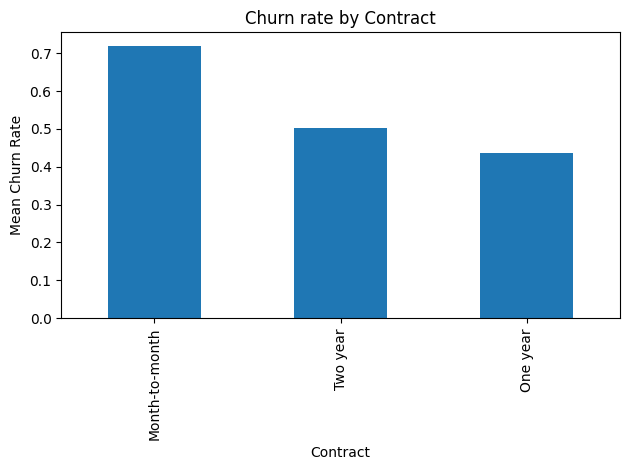

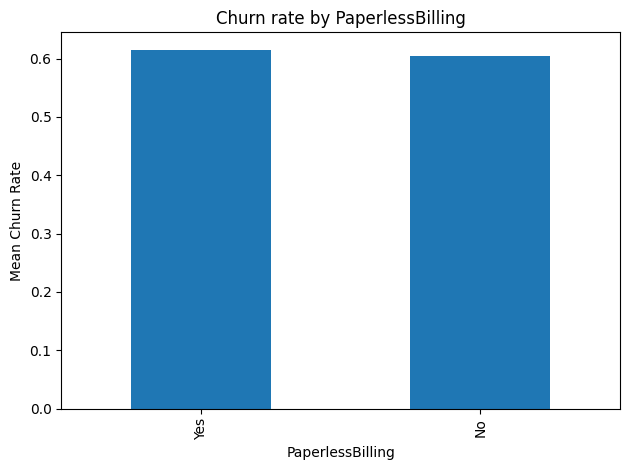

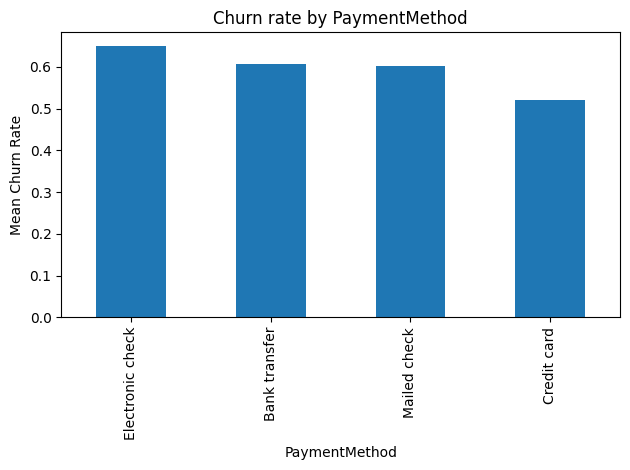

In [4]:
# EDA: Churn by categorical features
categorical_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

figures = []
for col in categorical_cols:
    rates = df.groupby(col)['ChurnFlag'].mean().sort_values(ascending=False)
    rates.plot(kind='bar', title=f'Churn rate by {col}')
    plt.ylabel('Mean Churn Rate')
    plt.tight_layout()
    plt.show()


           tenure  MonthlyCharges  TotalCharges
count  2000.00000     2000.000000   2000.000000
mean     35.82700       70.246390   2511.238450
std      21.03474       28.619899   1864.078903
min       0.00000       18.000000    -58.930000
25%      17.00000       49.850000   1001.232500
50%      36.00000       69.660000   2111.260000
75%      54.00000       89.932500   3737.775000
max      71.00000      160.000000  10223.310000


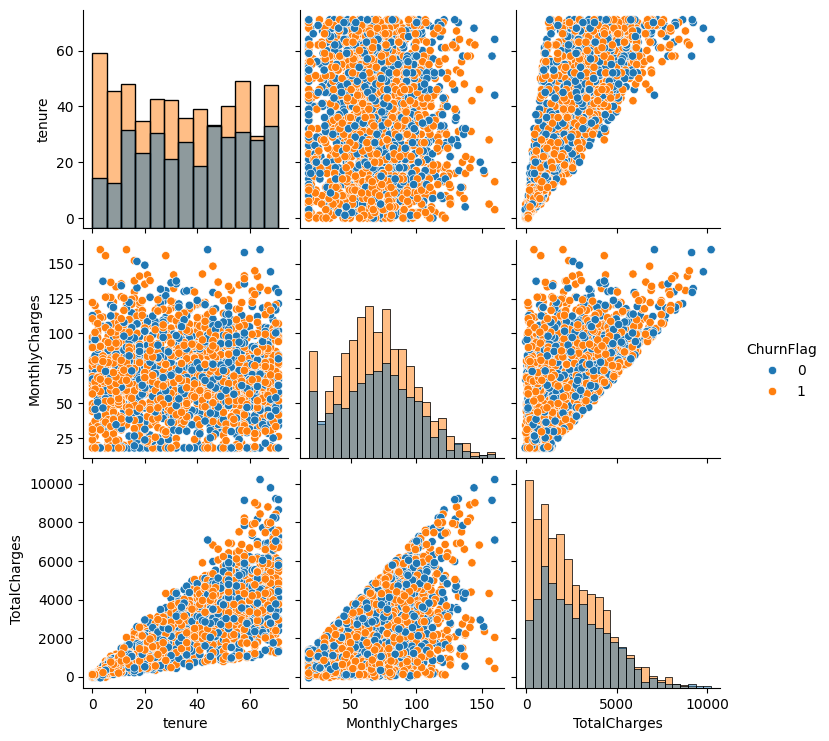

                  tenure  MonthlyCharges  TotalCharges  ChurnFlag
tenure          1.000000       -0.010365      0.776300  -0.104266
MonthlyCharges -0.010365        1.000000      0.533798  -0.012318
TotalCharges    0.776300        0.533798      1.000000  -0.085363
ChurnFlag      -0.104266       -0.012318     -0.085363   1.000000


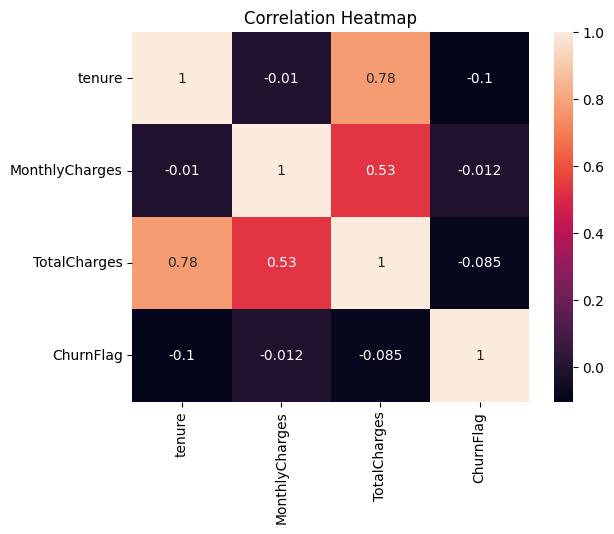

In [5]:
# EDA: Numeric distributions & correlation
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
print(df[numeric_cols].describe())

sns.pairplot(df[numeric_cols + ['ChurnFlag']], hue='ChurnFlag', diag_kind='hist')
plt.show()

corr = df[numeric_cols + ['ChurnFlag']].corr()
print(corr)
ax = sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()